# Aliquot Sequences Project

##### By Daniel Rushby (ppppp),  Emil Harris (aa12123),  Haziemah Mohammad Hazmann Emus (aa12123),
##### Joseph Grieveson (aa12123) and Zachary Dunn (aa12123)    
##### (Group Project XXX)

## Aliquot Sequences - An explanation

To understand an aliquot sequence, we furst have to get behind the notion of a  $\textbf{proper divisor}$


A proper divisor of a positive integer $𝑛$ is any positive integer divisor of $𝑛$ other than $n$ itself.

For example, if $n=12$, 

Then the divisiors of $12$ are: $1,2,3,4,6,12$

And the proper divisiors of $12$ are: $1,2,3,4,6$


Using this idea of proper divisiors, we can define the sum of proper divisors, $s(n)$, for a postive integer n to be:

$$ s(n) =  \displaystyle \sum_{d \mid n,\, 0 < d < n} d $$

'It gives the sum of all positive divisors of n, excluding n. Interest in this function goes back to the Pythagoreans (6th century B.C.E.). Aliquot sequences are the seqeunces formed by repeatedly applying this function.'

$\newline$

### Definition of the sequence

For each $n \in \mathbb{N}$, an Aliquot Sequence, $A_n$ is defined as:

$$ A_n = \{n,s(n),s^2(n), s^3(n), ... \} $$

where we have already defined $s(n)$ as the sum of the proper divisors, and where $s^2(n) = s(s(n)), \  s^3(n) = s(s(s(n))),...$etc

If $s^j(n) =0$ for some $j$, the sequence terminates after $j$.

$\newline$

### Interesting facts about Aliquot Sequences:

#### Perfect Numbers:

A perfect number is a postiver integer $n \in \mathbb{N} $, where $s(n) =n$.

For example, $6$ is a perfect number. The proper divisors of 6 are $1,2,3$. Thus, $ s(6) = 1+2+3 = 6$. 

Perfect Numbers are interesting. For starters, all known perfect numbers are even, and they have a specific formula for this, discovered by Euclid in 300 BC:

$$ \text{Even Perfect Number} = 2^{p-1} \cdot (2^p -1) $$

This doesn't mean that there are no odd perfect numbers, it is just that no mathematican has ever discovered one. It is said that it must be very lager, greater than $10^{1000} $.

Perfect numbers also grow very quickly. For instance, the first 6 perfect numbers are: $ 6,28,496,8128,33550336,8589896056 $, so the 6th perfect number has 10 digits! 

Regarding Aliquot Sequences, a perfect number $n$ creates a stable sequence. 

For example $A_6 = \{ 6,6,6,6,... \} $. Unlike most sequences, if $n$ is perfect, $A_n$ will continue forever with complete infinite repetitions of n, and will not decrease to 0. 

$\newline$

#### Amicable Numbers:

Two numbers, $a$ and $b$ (where $a,b \in \mathbb{N}$) are said to be amicable if:

$$ s(a) = b \quad \text{and} \quad s(b) = a $$

In other words, the sum of the proper divisors of a is b, and the sum of the proper divisors of b is a.

For example, let's look at $220$ and $280$:

$s(220) = 1+2+4+5+10+11+20+22+44+55+110 = 284$ 

$s(284) = 1+2+4+71+142 = 220 $

If a pair of numbers are amicable, it makes the Aliquot sequence for both numbers have loop of lenght two.

For instance, $A_{220} = \{ 220,284,220,284,20,.... \} $ which has a loop of two. This is the same for $A_{284}$

Like an Aliquot Sequence of a perfect number, a sequnce of an amicable number does not decrease to 0, but simply loops back and forth between the two numbers to for ininity.

More Examples of amicable numbers are: $(1184,1210), (2620,2924), (5020,5564) $

Although there is no definite formula to generate all the amicable number pairs, Thabit ibn Qurra discovered a formula in 9th century that generates some amicable pairs. 

$\newline$

#### Sociable Numbers 

Sociable numbers are numbers that form longer amicable chains. This means that if we add the positive divisors of a postive integre $n$, and then proceed to add the positive divisiors of the result, we can continue the process until we retunr back to n. 

Thus: $$ s(a) = b \quad s(b) = c \quad s(c) = d ..... s(p) = a $$ 

is a loop of sociable numbers. 

For example: $ s(12496) = 14288, s(14288) = 15472, s(15472) = 14536, s(14536) = 14264, s(14264) = 12496 $

Therfore, the Aliquot Sequence for 12469 is: $ A_{12496} = \{ 12496,14288,15472,14536,14264,12496,..... \}$, which is a looping Aliquot Sequence of period 5. 

$\newline$
$\newline$

### Different Types of Aliquot Sequences

'Surprisingly little is known about aliquot sequences. It is easy to see that there are three possible types of aliquot sequences:

 1. Those which terminate at zero
     
 2. Those which enter a loop.
     
 3. Those which continue infinitely but do not contain repeats.
     
It is not currently known whether there are any of type 3 but equally it is possible that most aliquot sequences are of this type. The goal of this project is explore these sequences computationally.'

$\newline$

'One of the difficulties is that calculating s(n) becomes computationally difficult once n is large because it involves factoring n into primes. Our project will consist of two main parts:

• Write code to compute some aliquot sequences.

• Use this code to explore questions about these sequences.

The efficiency of our code will determine how effectively we can investigate the sequences'



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import numpy.linalg as lag

## Coding to find Aliquot Sequeneces
### Finding s(n)
We are going to start off our coding in the hunt to compute an aliquot sequence for any given acceptable number (acceptable meaning up to a point where the computer can handle the size of the number without crashing) by finding an algoirthm to compute s(n).

#### Method

We are going to define a function s(n). 
If the number inputted to the function is 0 or 1, then we can state that the sum of prime divisors is going to be 0 form our knowledge, and we dont want 0 or 1 disrupting our algoirthm.
If the number is greater than 1, then we are going to start by setting a variable called 'total_sum' equal to 0. This is going to be constently appeneded/added to until it reaches the correct s(n) for a given number. 
We then say a for number d in a range 1 to the square root of n + 1, if we divide n by a all values of d in this range, and if the remainder is equal to 0, then we will continue through the code. (If we imagine the factors pairs for any given number, all the values of d that divide n are the smallest numbers of the factors pairs.)
So we will now add d to total_sum. 
If d is not the square root of the number n, or 1, then that means the other number that d makes in its factor pair will be less than n, and a proper divisor that has not already been added to total_sum as it is greater than the square root of n.  
Once we have been through the whole range of 1 to the square root of n +1, we return total_sum, giving us s(n).

In [2]:
# ---- CORE 1 ----

#'Write a function to calculate s(n).
#(Note: In week 8.2 (Appendix) there is a method that exploits the fact that the sum of all divisors is a multiplicative function.'

def s(n):
    # Return the sum of proper divisors of n.
    if n <= 1:
        return 0
        
    total_sum = 0
     # Loop through EVERY number from 1 up to square root of n, this makes the code quicker than doing it up to (just) n
    for d in range(1, int(n**0.5) + 1):
        if n % d == 0:
            other_d = n // d
            total_sum = total_sum + d
            if other_d != d and other_d != n:    
                # prevents sqrt adding twice for perfect squares (e.g for 16 prevents 4 being added twice)and prevents n itself being added
                total_sum = total_sum + other_d
                # add divisor pair
            
    return total_sum 
    # Return the final sum

In [3]:
#TEST OUR CODE HERE
s(200)

265

### Finding the Aliquot Sequence for n, and detecting loops in sequences
We are now going to find an algorithm to find an aliquot sequence. 

In our definition for our sequence, we are going to create a parameter (k_max) that will control the limit on the amount of terms of the sequence outputted. If an integer n has an aliqout sequence with more terms than the maximum set limit, we will say that the sequence has exceeded k.

We will also create a parameter (i_max), which is going to be the maximum value that any term can reach in the sequence. If a term in the sequence is above (i_max), we will say that the sequence has exceeded i, and will stop finding new terms.  

If there is a sequence for a number n that loops, for instance $A_{220} = \{ 220,284,220,284,.... \} $, we will say that we have a looping sequence.

If we have a normal aliquot sequence that termiates to 0, we will say that our sequence has terminated. 

Thus, we are going to find the sequence for any given number n, and give it a status. The four statuses are: 'exceeds k', 'exceeds i', 'loop', or 'terminated' 

We are aiming to get a code that runs for a reasonable time when k_max = 30, and i_max = 10^9


#### Method


In [4]:
# --- Core Part 2 Generate Sequence  --- 

#'For a given n, compute the aliquot sequence starting at n (up to a sensible point). 
# Practical suggestion: Write your code so that it computes at most the first k terms of the sequence. 
# Also, write it so that for some i, your code stops computing new terms onces $j (n) > i$. 
# At first, you can use lower values but you should aim to get code that runs in a reasonable time for $k = 30$ and $i = 109$.'

def compute_aliquot_sequence(n_start, k_max, i_max):
    '''
    n_start = starting position
    k_max = max number of steps sequence allowed to have
    i_max = max value the sequence allowed to have

    '''

    sequence = [n_start] #e.g if ur inputted value for n=10, then sequence = [10]
    
    seen = {n_start} # reate a set to keep track of numbers we've already seen in the sequence, This is used for detecting cycles/loops efficiently
    
    n = n_start #sets current number to starting value
    
    status = "Exceeds_k"  # Initialize status; "Exceeds_k" is the default if the sequence reaches k_max terms without other events



    #Loop to generate new terms in the sequence
    #range(k_max - 1) because the first term (n_start) is already in the sequence
    for i in range(k_max-1): 

        # Compute the next term using the sum-of-proper-divisors function
        n_next = s(n) 
        
        # Add the new term to our sequence
        sequence.append(n_next) # Add the new term to our sequence

        # --- Termination condition 1 ---
        # Check for termination, when it hits zero
        if n_next == 0:
            status = "Terminates" # Update status to indicate termination
            break # stop the loop

         # --- Termination condition 2 ---
        # If the next term exceeds the maximum allowed value, stop the sequence
        if n_next > i_max:
            status = "Exceeds_i"
            break 

        # --- Termination condition 3 ---
        # --- Core Part 3 The Loop ---
        # Look at the new term and check our 'seen' list (our memory)
        if n_next in seen: 
            status = "Loops"
            break 

        # Add the new term to the 'seen' set to remember it for future loop detection    
        seen.add(n_next)

        # Update 'n' to the new term for the next iteration
        n = n_next
        
    else:  # This 'else' executes only if the 'for' loop completes without hitting 'break' 
        # This means we generated k_max terms without termination, exceeding i_max, or looping
        # Loop finished without breaking
        status = "Exceeds_k"

    return (sequence, status)

    

    

In [5]:
#terminates example
print(compute_aliquot_sequence(100, 30, 10**9))

([100, 117, 65, 19, 1, 0], 'Terminates')


In [6]:
#exceeds k example
print(compute_aliquot_sequence(10000000, 30, 10**9))

([10000000, 14902280, 18750520, 25961480, 34993720, 47561480, 60965560, 76207040, 147223552, 230079488, 249901072, 288635888, 271808152, 363588968, 356814232, 326404568, 379237192, 331832558, 199294162, 117231914, 58664026, 29872358, 16281178, 8140592, 8059264, 8219936, 7963126, 3981566, 2072818, 1319102], 'Exceeds_k')


In [7]:
#loop example

print(compute_aliquot_sequence(220, 30, 10**9))

([220, 284, 220], 'Loops')


In [8]:
#exceeds i example
print(compute_aliquot_sequence(1000000000, 30, 10**9))

([1000000000, 1497558338], 'Exceeds_i')


### Classifying Aliquot Sequences

We are now going to compute an algorithm to classify and tally the types of aliquot sequences. We will find the aliquot sequences for each integer n up to 20,000, and from the previous code, its status will be determined. We will show how many of these 20,000 sequences are of the type 'exceeds k', 'exceeds i', 'loops', or 'terminates' in a tally. 

In [9]:
#----CORE 4 ----

#'For each $n < 20000$ try to classify it according to the end state of the aliquot sequence starting at n.
# Although there are three theoretical types, 
# classify sequences into the four cases where it either terminates at zero or enters a loop 
# or the calculation is cut short because you reached term k or the sequence exceeded i (where k and i are as in part 2.
# Present this classification by counting the number of sequences of this type, using the parameters $i = 109$ and $k = 30$.'



k_max = 30
i_max = 10**9
n_max = 20000

# Initialize counters for each type
counts = {
    "Terminates": 0,
    "Loops": 0,
    "Exceeds_k": 0,
    "Exceeds_i": 0
}

# Loop over all numbers 1...20000
for n in range(1, n_max +1):
    _, status = compute_aliquot_sequence(n, k_max, i_max)
    counts[status] += 1  # increment the counter for this status

# Print the results
for key, value in counts.items():
    print(f"{key}: {value}")

Terminates: 15623
Loops: 451
Exceeds_k: 3107
Exceeds_i: 819


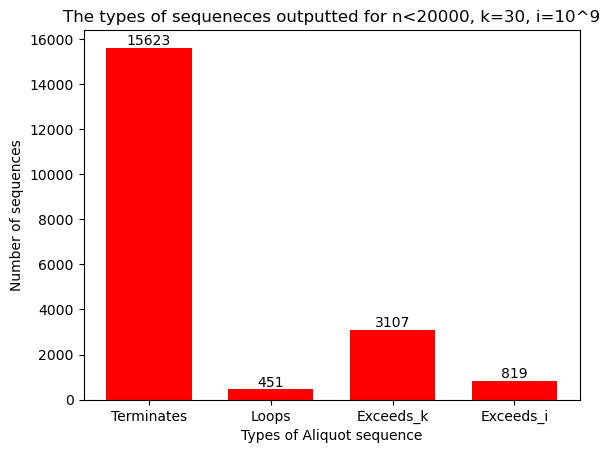

In [10]:
types = list(counts.keys())
values = list(counts.values())



bars = plt.bar(types, values, width=0.7, color='red')
plt.title('The types of sequeneces outputted for n<20000, k=30, i=10^9')
plt.xlabel('Types of Aliquot sequence')
plt.ylabel('Number of sequences')
# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height,                              # y position
        str(height),                         # label text
        ha='center', va='bottom'
    )
plt.show()

### Improving the code of the Classification 
We are very confident in the efficiency of our code above, but we are now going to test the limits of how large n_max, k_max and i_max can go so we can run the code in approximately 30 seconds.

We are going to set up an experiment function, which will test multiples combinations of n_max, k_max and i_max. 

To do this, we are going to loop over all n from 1 to n_max, and for each n generate the aliquot sequence and its status. We will then classify and tally all the sequences like above, and measure the run time for each combination of parameters.

We will show the results in a table, and then decide which combination of parameters will be the most reasonable to use as an improvement on the last question. 

The data in the table is from the code that is in ''' '''. This code takes 974.61 seconds, or 16 minutes to run. The data is copied from when the cell has been ran, and been put nicely into a table. 



In [11]:
#----CORE 5 ----

# 'The classification in part 4 will depend on the choices of the parameters k, i and the largest starting number of 20,000.
# There will be a better classification if these parameters are higher at the cost of the code taking longer to run.
# Investigate how much you can improve the classification while your code still runs in a reasonable amount of time.
# (The meaning of ‘reasonable’ depends on how patient you are, but we recommend about 30 seconds.)



"""import time
# --- Experimentation function ---
def experiment(n_max_values, k_max_values, i_max_values):
    results = []
    for n_max in n_max_values:
        for k_max in k_max_values:
            for i_max in i_max_values:
                counts = {"Terminates": 0, "Loops": 0, "Exceeds_k": 0, "Exceeds_i": 0}
                start_time = time.time()
                
                for n in range(1, n_max + 1):
                    _, status = compute_aliquot_sequence(n, k_max, i_max)  # unpack tuple
                    counts[status] += 1
                
                runtime = time.time() - start_time
                results.append({
                    "n_max": n_max,
                    "k_max": k_max,
                    "i_max": i_max,
                    **counts,
                    "runtime_s": round(runtime, 2)})
                print(f"Done n_max={n_max}, k_max={k_max}, i_max={i_max}, runtime={runtime:.2f}s")
    return results

# --- Set parameter ranges ---
n_max_values = [10000, 20000, 25000, 30000]      # Largest starting numbers
k_max_values = [30, 50, 100]       # Maximum sequence length
i_max_values = [10**9, 10**10]     # Maximum allowed value in sequence

# --- Run experiments ---
results = experiment(n_max_values, k_max_values, i_max_values)

# --- Print nicely formatted table ---
print("\nResults Table:")
header = ["n_max", "k_max", "i_max", "Terminates", "Loops", "Exceeds_k", "Exceeds_i", "runtime_s"]
print("{:<7} {:<7} {:<12} {:<10} {:<6} {:<10} {:<8} {:<10}".format(*header))
for r in results:
    print("{:<7} {:<7} {:<12} {:<10} {:<6} {:<10} {:<8} {:<10}".format(r["n_max"], r["k_max"], r["i_max"], r["Terminates"], r["Loops"], r["Exceeds_k"], r["Exceeds_i"], r["runtime_s"]))"""


'import time\n# --- Experimentation function ---\ndef experiment(n_max_values, k_max_values, i_max_values):\n    results = []\n    for n_max in n_max_values:\n        for k_max in k_max_values:\n            for i_max in i_max_values:\n                counts = {"Terminates": 0, "Loops": 0, "Exceeds_k": 0, "Exceeds_i": 0}\n                start_time = time.time()\n\n                for n in range(1, n_max + 1):\n                    _, status = compute_aliquot_sequence(n, k_max, i_max)  # unpack tuple\n                    counts[status] += 1\n\n                runtime = time.time() - start_time\n                results.append({\n                    "n_max": n_max,\n                    "k_max": k_max,\n                    "i_max": i_max,\n                    **counts,\n                    "runtime_s": round(runtime, 2)})\n                print(f"Done n_max={n_max}, k_max={k_max}, i_max={i_max}, runtime={runtime:.2f}s")\n    return results\n\n# --- Set parameter ranges ---\nn_max_values = [

### The results from running this code

$[
\begin{array}{|r|r|r|r|r|r|r|r|}
\hline
n_{\text{max}} & k_{\text{max}} & i_{\text{max}} & \text{Terminates} & \text{Loops} & \text{Exceeds}_k & \text{Exceeds}_i & \text{runtime}_s \\
\hline
10000 & 30 & 1\,000\,000\,000 & 8228 & 217 & 1255 & 300 & 3.59 \\
10000 & 30 & 10\,000\,000\,000 & 8228 & 217 & 1409 & 146 & 6.31 \\
10000 & 50 & 1\,000\,000\,000 & 8519 & 219 & 499 & 763 & 8.38 \\
10000 & 50 & 10\,000\,000\,000 & 8519 & 219 & 651 & 611 & 24.01 \\
10000 & 100 & 1\,000\,000\,000 & 8711 & 224 & 46 & 1019 & 10.71 \\
10000 & 100 & 10\,000\,000\,000 & 8715 & 224 & 88 & 973 & 37.06 \\
20000 & 30 & 1\,000\,000\,000 & 15623 & 451 & 3107 & 819 & 10.05 \\
20000 & 30 & 10\,000\,000\,000 & 15623 & 451 & 3514 & 412 & 18.7 \\
20000 & 50 & 1\,000\,000\,000 & 16487 & 457 & 1083 & 1973 & 20.51 \\
20000 & 50 & 10\,000\,000\,000 & 16487 & 457 & 1497 & 1559 & 61.91 \\
20000 & 100 & 1\,000\,000\,000 & 16979 & 465 & 98 & 2458 & 25.75 \\
20000 & 100 & 10\,000\,000\,000 & 16993 & 465 & 212 & 2330 & 88.39 \\
25000 & 30 & 1\,000\,000\,000 & 19231 & 548 & 4138 & 1083 & 13.03 \\
25000 & 30 & 10\,000\,000\,000 & 19231 & 548 & 4671 & 550 & 25.08 \\
25000 & 50 & 1\,000\,000\,000 & 20445 & 558 & 1415 & 2582 & 26.97 \\
25000 & 50 & 10\,000\,000\,000 & 20445 & 558 & 1978 & 2019 & 79.84 \\
25000 & 100 & 1\,000\,000\,000 & 21110 & 568 & 131 & 3191 & 32.7 \\
25000 & 100 & 10\,000\,000\,000 & 21137 & 568 & 283 & 3012 & 114.1 \\
30000 & 30 & 1\,000\,000\,000 & 22765 & 641 & 5246 & 1348 & 16.3 \\
30000 & 30 & 10\,000\,000\,000 & 22765 & 641 & 5912 & 682 & 31.73 \\
30000 & 50 & 1\,000\,000\,000 & 24350 & 656 & 1759 & 3235 & 33.89 \\
30000 & 50 & 10\,000\,000\,000 & 24350 & 656 & 2491 & 2503 & 101.03 \\
30000 & 100 & 1\,000\,000\,000 & 25175 & 669 & 166 & 3990 & 41.86 \\
30000 & 100 & 10\,000\,000\,000 & 25220 & 669 & 357 & 3754 & 143.71 \\
\hline
\end{array}
$

### Interpretation of the data

In [12]:
#DO Later


# Extension 9

In this section, we explore how we can make the code much more efficient by using pre-computed values and a prime sieve. 

In [13]:
# Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt 

# Set default values for K, I, and the maximum n value - these will be explained later
K_norm = 30

I_norm = 1e9

n_max = 20000

The function `prime_sieve` helps to find all the prime numbers up to a number $n$. This function is an efficient and fast way to obtain the primes especially for large $n$.


How the Prime Sieve algortihm works in theory:


**1.** Creates a list of consecutive integers from $2$ to $n$, the list starts with $2$ and marks all the multiples of that number (but not itself) as composite.


**2.** It then moves onto the next smallest unmarked number($3..5..7$) and does the same as before, repeating itself until it hits $\sqrt{n}$ and the rest of the unmarked numbers in the list are prime.


`prime_sieve` helps to make the `get_prime_factors` function and , thus, the `s(n)` function quicker.

In [14]:
# Prime sieve is an efficient way to find all the primes up to (and including) n
def prime_sieve(maximum=n_max):

    # There are no primes less than 2
    if maximum < 2:
        return None

    # Will create a list of True or False values corresponding to whether the index is a prime number
    # e.g. 3 is a prime number so the value in the 3rd index (4th position) will be true by the end of the function
    prime_mask = [True for _ in range(maximum+1)]

    # 0 and 1 are not prime
    prime_mask[0], prime_mask[1] = False, False

    # Only need to check up to root n
    for p in range(2, int(m.sqrt(maximum)) + 1):
        if prime_mask[p]:
            # go over multiples of each prime number, which will not be prime, and so set value in prime_mask to False
            for i in range(p*p, maximum+1, p):
                prime_mask[i] = False

    # change prime_mask into a numpy array so we can use a boolean mask
    prime_mask = np.array(prime_mask)

    # generate the array of numbers up to n and apply boolean mask to create array of prime numbers
    return np.array([i for i in range(maximum+1)])[prime_mask]


# PRIMES calculated using prime sieve up to the largest n we are going up to, divided by 2
# We can stop here as n cannot have a prime factor larger than n/2
# this can then be used to calculate s(n) for ALL the ns up to n_max, instead of prime_sieve being called for every n
PRIMES = prime_sieve(int(n_max/2) + 1)

A few things to note which make this much more efficient than before:

- It only searches up to $\sqrt{n}$, because any non-primes bigger than this will be caught by multiples of numbers up to $\sqrt{n}$

- Since it sets values in prime mask to False as it goes along, it ends up skipping all numbers in the original interval which aren't prime, since they will have been caught and set to False by one of their prime factors earlier in the loop

- By using a boolean mask we can edit our original array in place without having to make a seperate list storing which numbers are prime

- When the list of primes is caluclated at the very end, we only called the `prime sieve` function up to $\sqrt{n}$, since there can be up to 1 prime factor of a number $n$ thats bigger than $\sqrt{n}$

## Calculating $s(n)$

We can now use the **prime factors** to jump straight to $s(n)$ without having to calculate all the individual factors of $n$, which was very lengthy.

We can use the **prime factors** to find the **sum of divisors** for a given $n$ using the formula:

$$
\sigma(n) = \prod_{i=1}^{k} \left( \frac{p_i^{a_i + 1} - 1}{p_i - 1} \right)
$$

Where $p_i$ are the prime factors and $a_i$ are the powers of the prime factors.

The **sum of proper divisors** is then calculated using the forumla:

$$
s(n) = \sigma(n) - n
$$

First, we need to make a function which uses the primes calculated using `prime_sieve` to find the prime factors of a number:

In [15]:
# Using the PRIMES list get the prime factors of a number n
def get_prime_factors(n):

    primes = PRIMES

    # create an empty dictionary of prime factors
    # we will store this is prime : exponent pairs
    # e.g. n=12 will have prime_factors = {2 : 2, 3 : 1} as 12 = 2^2 x 3
    prime_factors = {}

    # go through each prime to check if it's a divisor of n
    for prime in primes:

        # Only need to check primes up to root n
        # There may be 1 prime bigger than root n, we will deal with this at the end
        if prime**2 > n:
            break

        # check if prime divides n and add to dictionary if it does
        if n % prime == 0:
            prime_factors[int(prime)] = 1

            # now we set n to n / prime so we dont count the same prime factor more than once
            n = n / prime

            # check if this new n is still divisible by the same prime.
            # For as long as it works keep increasing the exponent value assigned to the prime, and dividing n
            while n % prime == 0:
                prime_factors[int(prime)] += 1
                n = n / prime

        # if n reaches 1 we can stop early as we know we have found the prime factorisation of n
        if n == 1:
            break

    # now we check for the potential prime factor bigger than root n.
    # If we have checked all the primes up to root n and still haven't found all the prime factors,
    # we must be left with the last prime factor as n
    if n > 1:
        prime_factors[int(n)] = 1

    # return our completed list of prime factors
    return prime_factors


Now we are ready to calculate $s(n)$:

In [16]:
# Calculate s(n)
def s(n):

    # 1 has no proper divisors
    if n == 1:
        return 0

    total = 1

    # stores keys and values in unpackable pairs
    primes = get_prime_factors(n).items()

    for prime, power in primes:
        total *= (prime**(power+1) - 1)/(prime - 1)

    # return s(n)
    return total - n

## How much has this improved our code efficiency?

Previously, the program took 10.5 seconds to run for $i = 10^{9}$, $k = 30$ and caluclating and clasifying all sequences up to $n = 20000$. With these updates, it takes 4.87 seconds.

For bigger values of $i, k$ and $n$, for example $i = 10^{10}$, $k = 50$ and all sequences up to $n = 30000$, the program previously took 101.03 seconds. With these updates, it takes just 17.52 seconds.

Clearly these are massive imporvements in the speed. But we can do better...

## Where should we focus our efforts to further increase code efficiency? ##
In order to find the parts of code which are slowing us down, we can use the `time` module in python. When running the code for the second(larger) set of values above, the corresponding times were calculated:

- Running the prime sieve function (which only gets called once) for $n = 30000$ took less than 0.005 seconds. Since this fucntion does not take $K$ or $I$ as inputs, it will also only get slower as $n$ increases.
- On the other hand, generating the 30000 aliquot sequences took 15.82 seconds. This time will also increase with all 3 of $n$, $I$ and $K$.

Therefore it is clear that the latter is the part where we should focus our efforts to make the program faster.

## How do we make it faster? ##
At the moment, every time `s(n)` is called the program completely regenerates its prime factors and then sums them. We can use the decorator `@functools.cache` to make the program much faster. This works by storing the values returned by a function, and then if it is called again with the same input it will straight away return this value again without re-running the function.

Even though the function which generates the aliquot sequence will take the longest (since it contains multiple calls of `s(n)`), we cannot cache it since we will never call it with the same input more than once. On the other hand `s(n)` will be called with the same input many times, especially for large $n$. Caching `s(n)` will be more effective than the `get_prime_factors` function, since a call of `s(n)` contains a call of `get_prime_factors`. This means caching `s(n)` will have the effect of caching `get_prime_factors` as well as skipping unecessary use of the $s(n)$ formula.

Implementation of this is very simple, we simply add the decorator right above the function:

In [17]:
import functools

@functools.cache
def s(n):

    # 1 has no proper divisors
    if n == 1:
        return 0

    # the following uses the formula: (insert in latex later)
    # to calculate the sum of all the factors of n using only its prime factors
    total = 1

    primes = get_prime_factors(n).items()

    for prime, power in primes:
        total *= (prime**(power+1) - 1)/(prime - 1)

    # return s(n)
    return total - n

## How much has this improved our code efficiency?
Generating and sorting the first 30000 aliquot sequences now takes just 2.44 seconds with $K = 50$ and $I = 10^9$. Running the full code from start to finish now takes just over 2.5 seconds to run (a dramatic improvement from the previous 17.5 seconds)! Too better compare this to later results, we also run the program for $n = 100000$, $K = 1000$, $I = 10^{12}$. This takes about 21.5 seconds to run in full.

There is one more thing we can do to try and make the code faster. Currently the `get_prime_factors` function completely re-computes the prime factors for each new n. But the way we have programmed it naturally lends itself to a simple change which can make it faster. Since the function works by continuously dividing n until it reaches 1, if we find a number we have already factorised during the dividing process we straight away know the factorisation of the original number. For example, lets say we know $15 = 3 * 5$. Then if we have $n = 60$, first the function will divide by 2 twice. We will then reach $n = \frac{60}{4} = 15$ Therefore we straight away know that the prime factors of 60 are $2^2 * 15 = 2^2 * 3 * 5$

We implement this by adding a few bits of code:

- First we make an empty dictionary called `factorisations`. This will store the prime factors of a number in key, value pairs where the values are dictionaries themselves.

- Then we adjust `get_prime_factors` as follows:

In [18]:
# Using the PRIMES list get the prime factors of a number n
def get_prime_factors(n):

    global factorisations

    if n in factorisations:
        return factorisations[n]

    primes = PRIMES

    # create an empty dictionary of prime factors
    # we will store this is prime : exponent pairs
    # e.g. n=12 will have prime_factors = {2 : 2, 3 : 1} as 12 = 2^2 x 3
    prime_factors = {}

    # go through each prime to check if it's a divisor of n
    for prime in primes:

        # Only need to check primes up to root n
        # There may be 1 prime bigger than root n,we will deal with this at the end
        if prime**2 > n:
            break

        # check if prime divides n and add to dictionary if it does
        if n % prime == 0:
            prime_factors[int(prime)] = 1

            # now we set n to n / prime, so we don't count the same prime factor more than once
            n = n / prime

            # New code starts here
            #Check if we know the factorisation of the new n we created
            if n in factorisations:
                facts = factorisations[n].copy()

                # Combine the factors we already had with the new ones
                for key, power in prime_factors.items():
                    try:
                        facts[key] += power

                    except KeyError:
                        facts[key] = power

                # We have found the full factorisation so we can end the program early
                return facts
            # And ends here

            # check if this new n is still divisible by the same prime.
            # For as long as it works keep increasing the exponent value assigned to the prime, and dividing n
            while n % prime == 0:
                prime_factors[int(prime)] += 1
                n = n / prime

        # if n reaches 1 we can stop early as we know we have found the prime factorisation of n
        if n == 1:
            break

    # now we check for the potential prime factor bigger than root n.
    # If we have checked all the primes up to root n and still haven't found all the prime factors,
    # we must be left with the last prime factor as n
    if n > 1:
        prime_factors[int(n)] = 1

    # return our completed list of prime factors
    return prime_factors

- Lastly, after we have called `get_prime_factors` inside `s(n)`, we simply add the output to our factorisations dictionary. (The complete uopdated code is included at the end of this section)

## How much has this improved our code efficiency?
For the values $n = 100000$, $K = 1000$ and $I = 10^{12}$, the program now takes about 19.5 seconds. This has made the program faster but not nearly as effectively as the previous changes. After running some simple tests, it looks like the new code is being run on about half of the calls to `get_prime_factors`. This means the time savings are probably only slight due to the code taking a long time to execute - this is believable as the dictioary will be very big and so will take a long time to search through, and merging the dictionaries is slow. 

The full final code has been included below:

In [34]:
# Imports
import functools
import math as m
import numpy as np
import time as t

# Set default values for K, I, and the maximum n value
K_norm = 1000

I_norm = 1e12

n_max = 100000

start_time = t.perf_counter()


def prime_sieve(maximum=n_max):

    # There are no primes less than 2
    if maximum < 2:
        return None

    # Will create a list of True or False values corresponding to whether the index is a prime number
    # e.g. 3 is a prime number so the value in the 3rd index (4th position) will be true by the end of the function
    prime_mask = [True for _ in range(maximum+1)]

    # 0 and 1 are not prime
    prime_mask[0], prime_mask[1] = False, False

    # Only need to check up to root n
    for p in range(2, int(m.sqrt(maximum)) + 1):
        if prime_mask[p]:
            # go over multiples of each prime number, which will not be prime, and so set value in prime_mask to False
            for i in range(p*p, maximum+1, p):
                prime_mask[i] = False

    # generate the array of numbers up to n and apply boolean mask to create array of prime numbers
    return np.array([i for i in range(maximum+1)])[prime_mask]


PRIMES = prime_sieve()
print(f'primes found after {t.perf_counter() - start_time}s')
factorisations = {}


# Using the PRIMES list get the prime factors of a number n
def get_prime_factors(n):

    global factorisations

    if n in factorisations:
        return factorisations[n]

    primes = PRIMES

    # create an empty dictionary of prime factors
    # we will store this is prime : exponent pairs
    # e.g. n=12 will have prime_factors = {2 : 2, 3 : 1} as 12 = 2^2 x 3
    prime_factors = {}

    # go through each prime to check if it's a divisor of n
    for prime in primes:

        # Only need to check primes up to root n
        # There may be 1 prime bigger than root n,we will deal with this at the end
        if prime**2 > n:
            break

        # check if prime divides n and add to dictionary if it does
        if n % prime == 0:
            prime_factors[int(prime)] = 1

            # now we set n to n / prime, so we don't count the same prime factor more than once
            n = n / prime

            if n in factorisations:
                facts = factorisations[n].copy()

                for key, power in prime_factors.items():
                    try:
                        facts[key] += power

                    except KeyError:
                        facts[key] = power

                return facts

            # check if this new n is still divisible by the same prime.
            # For as long as it works keep increasing the exponent value assigned to the prime, and dividing n
            while n % prime == 0:
                prime_factors[int(prime)] += 1
                n = n / prime

        # if n reaches 1 we can stop early as we know we have found the prime factorisation of n
        if n == 1:
            break

    # now we check for the potential prime factor bigger than root n.
    # If we have checked all the primes up to root n and still haven't found all the prime factors,
    # we must be left with the last prime factor as n
    if n > 1:
        prime_factors[int(n)] = 1

    # return our completed list of prime factors
    return prime_factors

# Calculate s(n)
@functools.cache
def s(n):

    global factorisations

    # 1 has no proper divisors
    if n == 1:
        return 0

    # the following uses the formula: (insert in latex later)
    # to calculate the sum of all the factors of n using only its prime factors
    total = 1

    primes_dict = get_prime_factors(n)
    primes = primes_dict.items()
    factorisations[n] = primes_dict

    for prime, power in primes:
        total *= (prime**(power+1) - 1)/(prime - 1)

    # return s(n)
    return total - n


# Calculate the aliquot sequence of n
def aliq_seq(n, K=K_norm, I=I_norm):

    # n will be the first element of its aliquot sequence
    seq = [n]

    # make an empty set to record all the s(n)s in order to detect loops
    seen = set()

    curr_n = n
    # loop max k times to compute and check each s(n)
    # return always ends the function so no more code will run after one of the checks is 'failed'
    for k in range(K):

        # check if sequence is terminated
        if curr_n == 0:
            return seq, 'terminated'

        # check if number is bigger than specified i
        if curr_n >= I:
            return seq, 'I reached'

        # check if sequence has looped
        if curr_n in seen:
            return seq, 'looped'

        # add n to sequence of seen numbers
        # has to be done after checks otherwise it will always think it loops
        seen.add(curr_n)

        # calculate next term of sequence if n has 'passed' all tests
        curr_n = s(curr_n)
        seq.append(int(curr_n))

    # If loop finished and has computed all k s(n), the sequence is finished (up to where we have decided to stop)
    # so returns sequence and the status that k has been reached
    return seq, 'K reached'


# make dictionary to count the number of types of each sequence
counts = {'terminated': 0, 'looped': 0, 'I reached': 0, 'K reached': 0}

# generate sequences up to 20000 (or whatever n_max is) and update counts dictionary
for i in range(1, n_max + 1):
    status = aliq_seq(i)[1]
    counts[status] += 1

print(f'aliquot sequences found after {t.perf_counter() - start_time}s')
print(counts)

primes found after 0.02160347200697288s
aliquot sequences found after 25.24634796200553s
{'terminated': 82761, 'looped': 2115, 'I reached': 15124, 'K reached': 0}


## Extention 7 
using graphs to examine different aspects of looped alliquot sequences

# line graphs of all the loops
Only graphing the values that are part of the loop. Not including the pre loop values

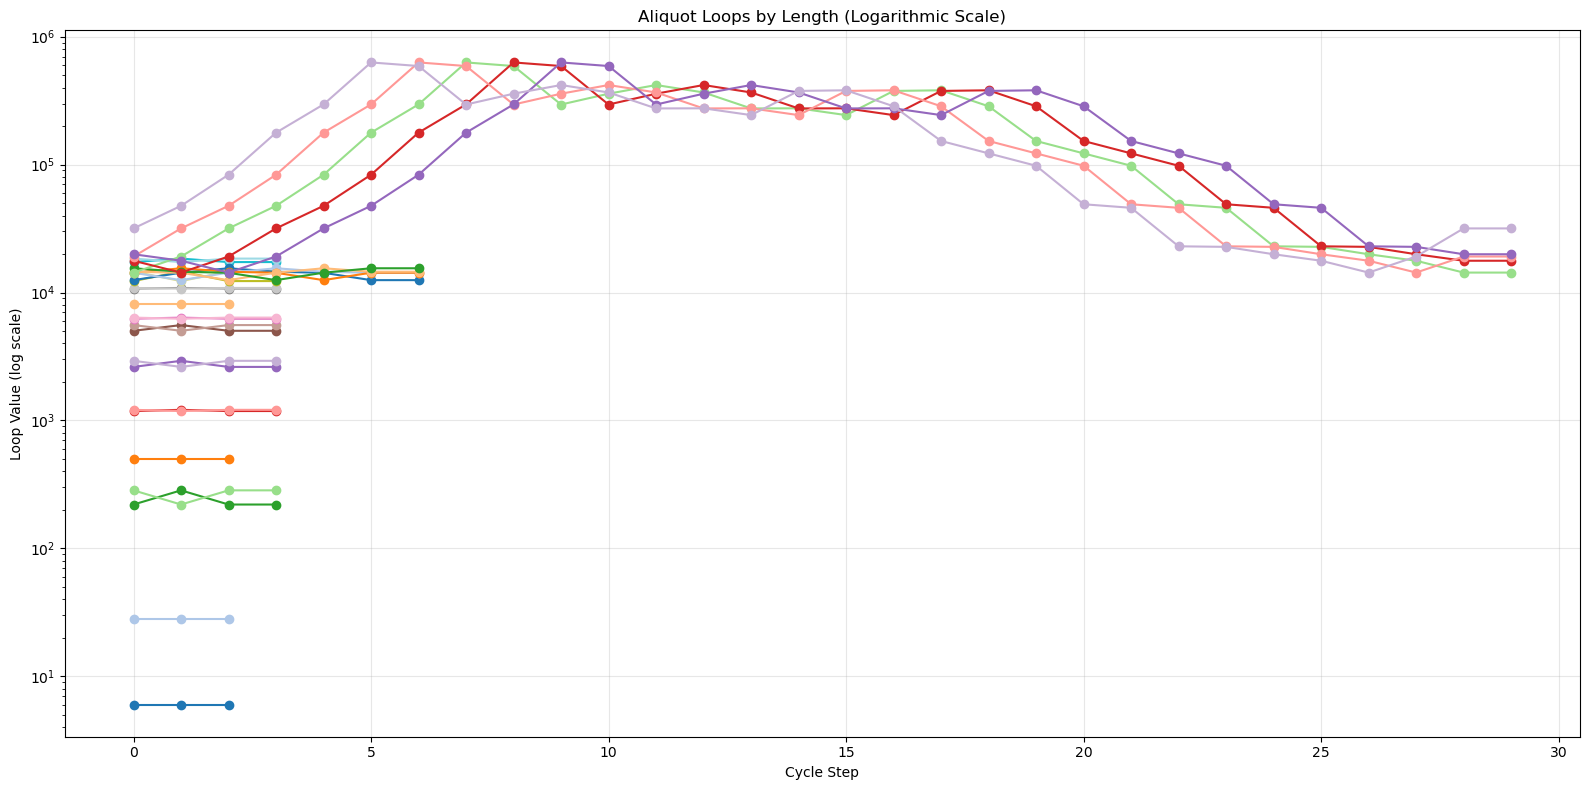

In [41]:

import matplotlib.pyplot as plt
import numpy as np

K_norm = 30

I_norm = 1e9

n_max = 20000
loops_by_length = {}

for n in range(1, n_max + 1):
    seq, status = aliq_seq(n, K_norm, I_norm)

    if status == 'looped':

#find where the loop starts
        seen = {}
        for i, val in enumerate(seq):
            if val in seen:
                loop_start = seen[val]
                break
            seen[val] = i

        loop_cycle = seq[loop_start:]          # raw loop from seq
        loop_cycle = tuple(loop_cycle)         # convert to tuple


        # Store by loop length 
        L = len(loop_cycle)

        if L not in loops_by_length:
            loops_by_length[L] = set()

        loops_by_length[L].add(loop_cycle)


#print out all the lists
#print("\nALL ALIQUOT LOOPS SORTED BY LENGTH:\n")

#for L in sorted(loops_by_length.keys()):
    #print(f"Loop length {L}:")
    #for loop in sorted(loops_by_length[L]):
        #print("  ", loop)
    #print()



plt.figure(figsize=(16, 8))

colors = plt.cm.tab20  # colour map 
color_idx = 0

for L in sorted(loops_by_length.keys()):
    for loop in sorted(loops_by_length[L]):

        loop_list = list(loop)

        # close the loop 
        y_vals = loop_list + [loop_list[0]]
        x_vals = list(range(len(y_vals)))

        plt.plot(
            x_vals,
            y_vals,
            marker='o',
            color=colors(color_idx % 20),
            label=f"Len {L}: {loop_list[0]}…"
        )
        color_idx += 1

plt.yscale("log")
plt.xlabel("Cycle Step")
plt.ylabel("Loop Value (log scale)")
plt.title("Aliquot Loops by Length (Logarithmic Scale)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


This graph shows that all the loops have values which are close to each other. This is the case for all of except for the loop of length 28 where the values climb a lot before returning back down. This implies that if the values in a loop are far away from each other the the loop will be of a large period.

# Bar Chart
What we will try to show through a bar chart of width $1,000$ is whether the likelihood of a starting number resulting in a loop increases, decreases or stays the same as the starting number increases.

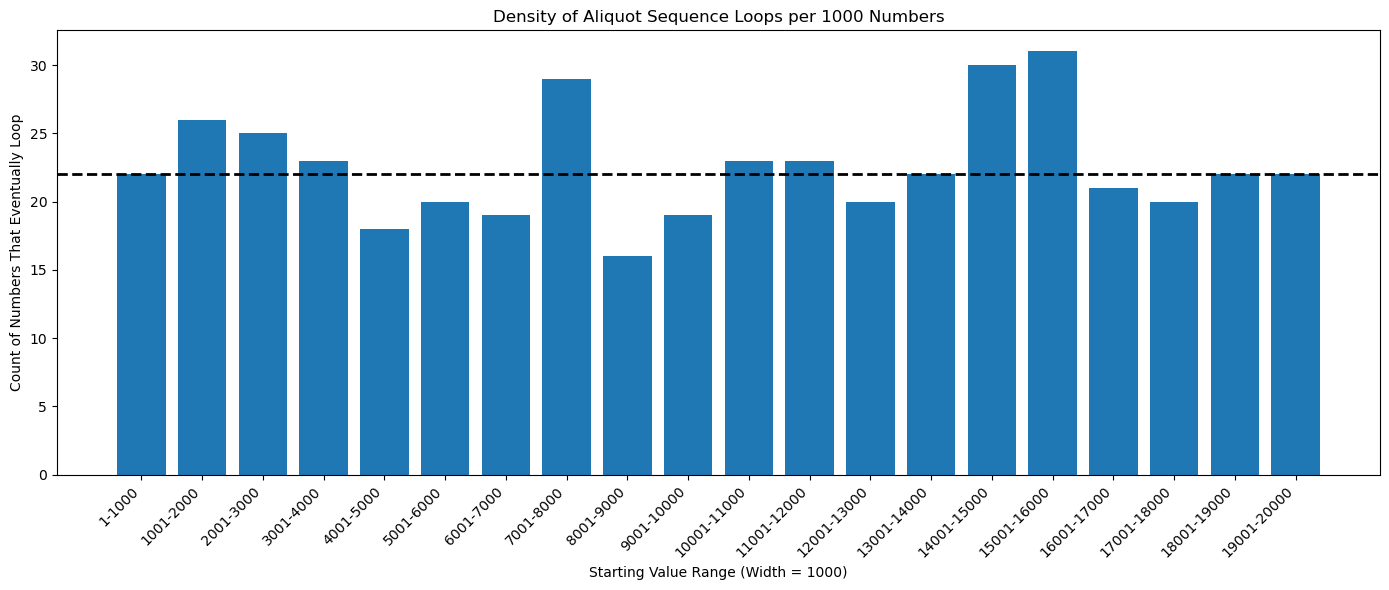

In [43]:
# Compute density (counts) of loop-starting numbers per 1000-wide band

band_width = 1000
num_bands = n_max // band_width

loop_counts = np.zeros(num_bands, dtype=int)

for start in range(1, n_max + 1):
    seq, status = aliq_seq(start, K_norm, I_norm)
    if status == "looped":
        band_index = (start - 1) // band_width
        loop_counts[band_index] += 1

# Plot the bar graph

import matplotlib.pyplot as plt

bands = [f"{i*band_width+1}-{(i+1)*band_width}" for i in range(num_bands)]

plt.figure(figsize=(14, 6))
plt.bar(range(num_bands), loop_counts)

plt.xticks(range(num_bands), bands, rotation=45, ha='right')
plt.xlabel("Starting Value Range (Width = 1000)")
plt.ylabel("Count of Numbers That Eventually Loop")
plt.title("Density of Aliquot Sequence Loops per 1000 Numbers")

#line of best fit
plt.axhline(y=22, color='black', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()


Here you can see that no matter what the starting value is the chance of an alliquot sequence entering a loop is of a uniform distribution as can clearly be seen with only a few fluctuations. From looking at the graph, you can come to the conclution that there are roughly 22 numbers which enter a loop, for every thousand checked (as shown by the line of best fit). Comparing this to the actual result of $446 / 20,000$ equating to 22.3 numbers entering. This shows that the graph is outputting the correct data.

# Scatter Graph 
Here we will look at how the first looped value compares to the starting input.

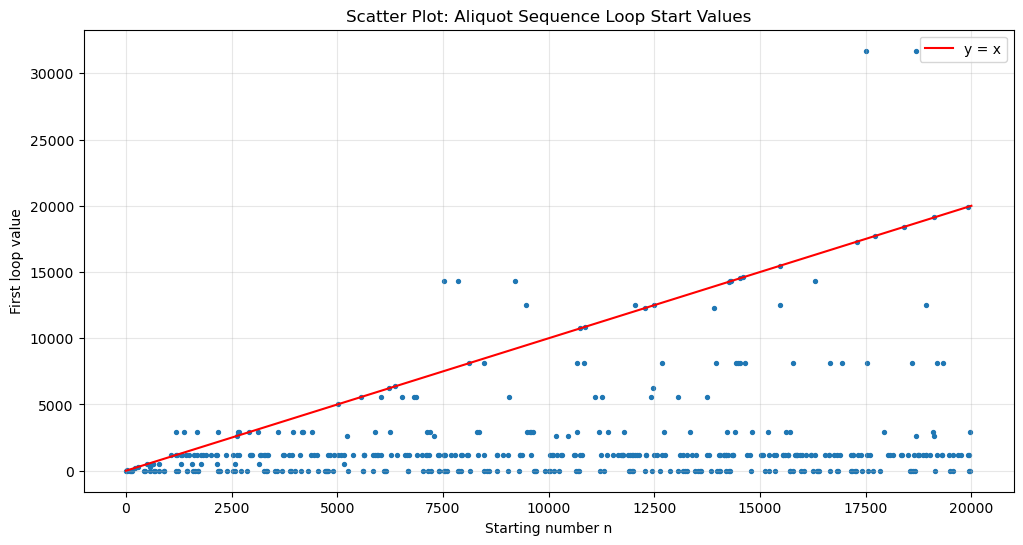

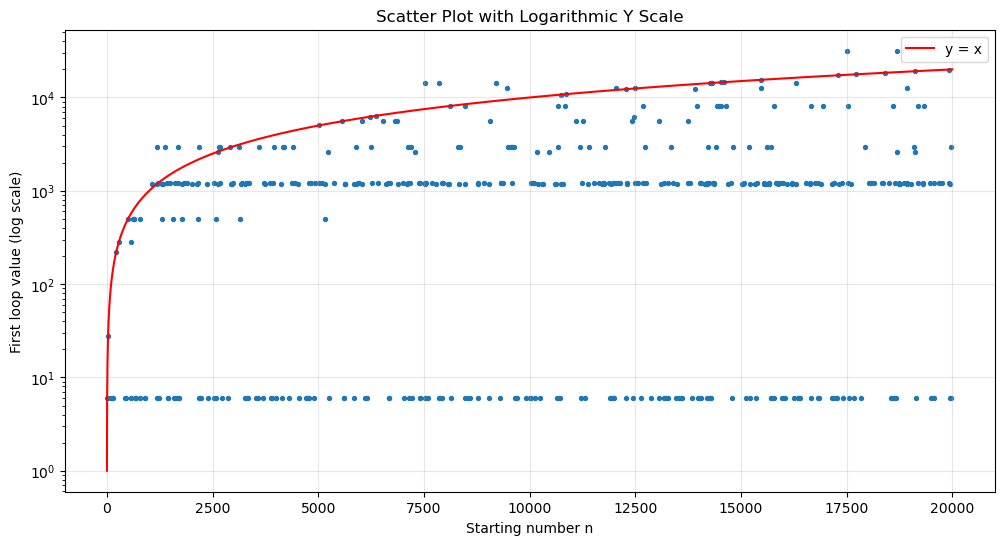

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Collect (start_n, first_loop_number)
loop_starts = []

for n in range(1, n_max + 1):
    seq, status = aliq_seq(n, K_norm, I_norm)
    if status == 'looped':

        # Detect the first loop value
        seen = {}
        for i, val in enumerate(seq):
            if val in seen:
                loop_start_value = val
                break
            seen[val] = i

        loop_starts.append((n, loop_start_value))

# Convert to lists for plotting
starts = np.array([p[0] for p in loop_starts])
loop_vals = np.array([p[1] for p in loop_starts])


#PLOT 
plt.figure(figsize=(12,6))
plt.scatter(starts, loop_vals, s=8)
plt.xlabel("Starting number n")
plt.ylabel("First loop value")
plt.title("Scatter Plot: Aliquot Sequence Loop Start Values")
plt.grid(True, alpha=0.3)

x = np.linspace(1, n_max, n_max)
plt.plot(x, x, color='red', label="y = x")

plt.legend()
plt.show()


# 2. LOG-SCALE PLOT (y-axis logarithmic)

plt.figure(figsize=(12,6))
plt.scatter(starts, loop_vals, s=8)
plt.xlabel("Starting number n")
plt.ylabel("First loop value (log scale)")
plt.title("Scatter Plot with Logarithmic Y Scale")
plt.yscale("log")
plt.grid(True, alpha=0.3)

plt.plot(x, x, color='red', label="y = x")

plt.legend()
plt.show()


Once more, this demonstrates how looped alliquot sequences are generally evenly spaced apart from each other. This scatter graph builds on this to show that most of the looped sequences enter the loop at smaller numbers 

It is also interesting to note that there seems to be a directly proportional relationship between starting number and the highest value for the first loop value. This shows that when a number in an alliquot sequence gets bigger then it is highly unlikely to reach a loop without it coming back down as the greatest values come from when it loops immediately. 

When looking at the logarithmic sclae, you can see that the most common loops to enter are the perfect number 6 and the amicable pair 1184,1210. This could be

# histogram of loop lengths
Used to see the distribution of different lengths.

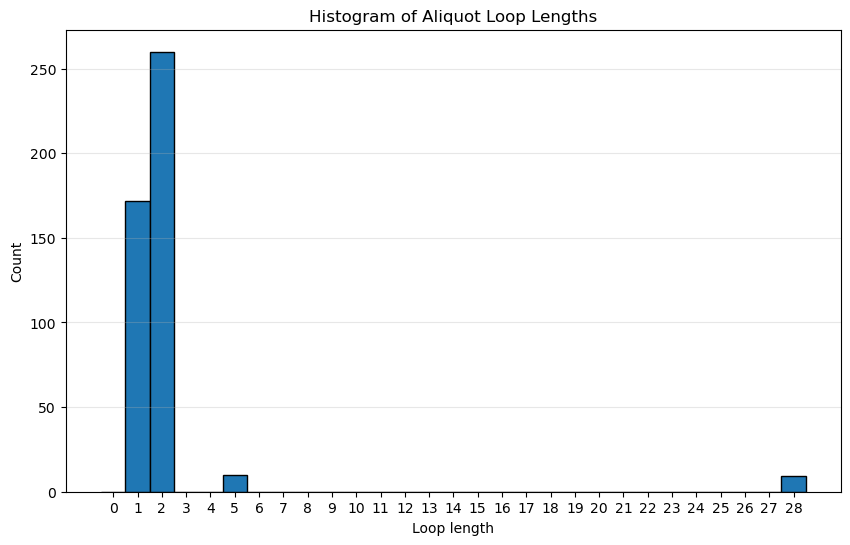

In [51]:
import matplotlib.pyplot as plt

# List to store adjusted cycle lengths
loop_lengths = []

for n in range(1, n_max + 1):
    seq, status = aliq_seq(n, K_norm, I_norm)
    if status == 'looped':

        # Find first repeated index
        seen = {}
        loop_start_index = None

        for i, val in enumerate(seq):
            if val in seen:
                loop_start_index = seen[val]
                break
            seen[val] = i

        # Extract loop
        loop_cycle = seq[loop_start_index:]
        loop_length = len(loop_cycle) - 1

        # Store loop_length 
        loop_lengths.append(loop_length)

#plot histogram
plt.figure(figsize=(10,6))

# histogram bins: from 0 up to max length
plt.hist(loop_lengths, 
         bins=range(0, max(loop_lengths)+2), 
         edgecolor='black', 
         align='left')

plt.xlabel("Loop length")
plt.ylabel("Count")
plt.title("Histogram of Aliquot Loop Lengths")
plt.xticks(range(0, max(loop_lengths)+1))
plt.grid(axis='y', alpha=0.3)

plt.show()




This shows that the majority of sequences that end in a loop mostly end up at either at a perfect number or an amicable pair. This matches the findings from the previous graph as 6 is a perfect number and 1184 and 1210 are an amicable pair. 

It is interesting to note that we found no loops of length 3 or 4 but different orientations of one loop for 5 existed. If you analyse the loops, the sequence values goes from even to even, or if they contain a last digit of 5 then they go to another 5. This indicates that any length of loop theoretically should exist. 

### Conclusion